# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">2. Model Training for Insurance Dataset-Vinay Singh</p>

### Loading the necessary Libraries

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Read the Dataset</p>

In [2]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'region' variable:     ",end=" " )
print(df['region'].unique())

Categories in 'sex' variable:      ['female' 'male']
Categories in 'region' variable:      ['southwest' 'southeast' 'northwest' 'northeast']


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Getting X and Y variables</p>

In [4]:
X = df.drop(labels=['expenses'],axis=1)
Y = df[['expenses']]

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Creating Data Transformation Pipeline</p>

#### Creating Pipeline with Column Transformer

In [5]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline



# Numerical Pipeline
num_pipeline = Pipeline(
                steps = [
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())                
                ]
            )


# Categorical Pipeline
cat_pipeline = Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')),
                ('encoder',OneHotEncoder(handle_unknown="ignore")),
                ('scaler',StandardScaler(with_mean=False))
                
                ]
            )

preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,num_features),
                ('cat_pipeline',cat_pipeline,cat_features)
                ]
            )

In [6]:
#visualise pipleine
from sklearn import set_config

In [7]:
set_config(display='diagram')

In [8]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [9]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('scaler', StandardScaler(with_mean=False))])

In [10]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Train Test Split</p>

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Transforming the data with pipeline created</p>

In [12]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [13]:
X_train.head()

,num_pipeline__age,num_pipeline__bmi,num_pipeline__children,cat_pipeline__sex_female,cat_pipeline__sex_male,cat_pipeline__smoker_no,cat_pipeline__smoker_yes,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest
0,0.472227,-1.748572,0.734336,2.000591,0.0,2.474361,0.0,0.000000,2.343968,0.00000,0.0
1,0.543313,-1.036704,-0.911192,2.000591,0.0,2.474361,0.0,2.310843,0.000000,0.00000,0.0
2,0.898745,-0.937373,-0.911192,2.000591,0.0,2.474361,0.0,0.000000,0.000000,2.26727,0.0
3,-0.025379,0.618804,3.202629,2.000591,0.0,2.474361,0.0,0.000000,0.000000,2.26727,0.0
4,1.040918,-1.500246,1.557100,2.000591,0.0,2.474361,0.0,0.000000,2.343968,0.00000,0.0


In [14]:
X_test.head()

,num_pipeline__age,num_pipeline__bmi,num_pipeline__children,cat_pipeline__sex_female,cat_pipeline__sex_male,cat_pipeline__smoker_no,cat_pipeline__smoker_yes,cat_pipeline__region_northeast,cat_pipeline__region_northwest,cat_pipeline__region_southeast,cat_pipeline__region_southwest
0,0.401140,-0.887708,0.734336,2.000591,0.000000,2.474361,0.000000,2.310843,0.000000,0.0,0.0
1,-0.238638,-0.093064,-0.911192,2.000591,0.000000,2.474361,0.000000,0.000000,2.343968,0.0,0.0
2,1.751782,-0.606272,-0.911192,2.000591,0.000000,0.000000,2.474361,0.000000,2.343968,0.0,0.0
3,0.472227,-0.804933,1.557100,0.000000,2.000591,2.474361,0.000000,0.000000,2.343968,0.0,0.0
4,-1.447107,0.221482,-0.911192,0.000000,2.000591,0.000000,2.474361,0.000000,2.343968,0.0,0.0


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Model Training Baseline models</p>

#### Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Training Various models

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train.values.flatten()) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6105.2470
- Mean Absolute Error: 4208.8744
- R2 Score: 0.7418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5796.6842
- Mean Absolute Error: 4182.4292
- R2 Score: 0.7836


Lasso
Model performance for Training set
- Root Mean Squared Error: 6105.2457
- Mean Absolute Error: 4207.9237
- R2 Score: 0.7418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5796.8314
- Mean Absolute Error: 4181.7757
- R2 Score: 0.7836


Ridge
Model performance for Training set
- Root Mean Squared Error: 6105.2481
- Mean Absolute Error: 4208.3392
- R2 Score: 0.7418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5796.9140
- Mean Absolute Error: 4182.1393
- R2 Score: 0.7835


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4488.5004
- Mean Absolute Error: 2713.7156


In [17]:
df_results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
df_results

,Model Name,R2_Score
7,CatBoosting Regressor,0.866221
5,Random Forest Regressor,0.860758
6,XGBRegressor,0.839258
8,AdaBoost Regressor,0.818970
3,K-Neighbors Regressor,0.799489
0,Linear Regression,0.783563
1,Lasso,0.783552
2,Ridge,0.783546
4,Decision Tree,0.736329


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Hyperparameter tuning</p>

In [18]:
# Initializing catboost
cbr = CatBoostRegressor(verbose=False)

# Creating the hyperparameter grid
param_dist = {'depth'          : [6,7,8,9, 10],
              'learning_rate' : [0.01,0.03,0.5,0.1],
               'iterations'    : [300,400,500,600]}

#Instantiate RandomSearchCV object
rscv = RandomizedSearchCV(cbr , param_dist, scoring='r2', cv =5, n_jobs=-1)

# Fit the model
rscv.fit(X_train, y_train.values.flatten())

# Print the tuned parameters and score
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.01, 'iterations': 600, 'depth': 7}
0.8448225574492314


In [19]:
def print_evaluated_results(model,xtrain,ytrain,xtest,ytest):
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, ytrain_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, ytest_pred)

    # Printing results
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

In [20]:
# Selecting best model
best_cbr = rscv.best_estimator_

# Evaluate Train and Test dataset
print_evaluated_results(best_cbr,X_train,y_train,X_test,y_test)

Model performance for Training set
- Root Mean Squared Error: 3933.0053
- Mean Absolute Error: 2191.6540
- R2 Score: 0.8928
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4393.3989
- Mean Absolute Error: 2486.7774
- R2 Score: 0.8757


# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Catboost Model Feature Importances</p>

cat_pipeline__smoker_yes          37.857025
cat_pipeline__smoker_no           37.162844
num_pipeline__bmi                 11.693037
num_pipeline__age                  8.764551
num_pipeline__children             1.801978
cat_pipeline__region_northeast     0.604382
cat_pipeline__sex_female           0.510666
cat_pipeline__sex_male             0.451488
cat_pipeline__region_northwest     0.448936
cat_pipeline__region_southwest     0.385512
cat_pipeline__region_southeast     0.319582
dtype: float64




<Axes: title={'center': 'Catboost Feature importances'}, xlabel='feature importance', ylabel='feature name'>

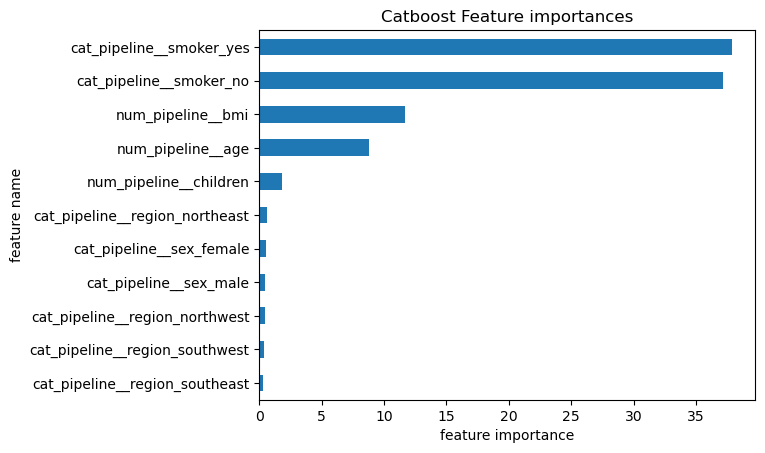

In [21]:
feature_imp = best_cbr.feature_importances_
feature_nm = best_cbr.feature_names_
imp_series = pd.Series(feature_imp)
imp_series.index = feature_nm
print(imp_series.sort_values(ascending=False))
print('\n')
imp_series.sort_values().plot(kind='barh',
                              xlabel='feature importance',
                              ylabel='feature name',
                              title='Catboost Feature importances')